# SPACEc: Cellular Neighborhood Analysis

### Set up environment

In [1]:
import spacec as sp

#import standard packages
import os
import scanpy as sc

# silencing warnings
import warnings
warnings.filterwarnings('ignore')

INFO:root: * TissUUmaps version: 3.1.1.6


In [2]:
root_path = "/home/tim/Dokumente/SPACEc_Apr_2024/"

data_path = root_path / 'data/' # where the data is stored

# where you want to store the output
output_dir = root_path + '_outs/'
os.makedirs(output_dir, exist_ok=True)

In [3]:
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [4]:
adata = sc.read(output_dir + 'adata_nn_demo_annotated_cn.h5ad')
adata

AnnData object with n_obs × n_vars = 46789 × 59
    obs: 'DAPI', 'x', 'y', 'area', 'region_num', 'unique_region', 'condition', 'leiden_1', 'leiden_1_subcluster', 'cell_type_coarse', 'cell_type_coarse_subcluster', 'cell_type_coarse_f', 'cell_type_coarse_f_subcluster', 'cell_type_coarse_f_f', 'cell_type', 'CN_k20_n40', 'CN_k20_n30', 'CN_k20_n20', 'CN_k20_n25', 'CN_k20_n6', 'CN_k20_n6_annot'
    uns: 'CN_k20_n6_colors', 'Centroid_k20_n20', 'Centroid_k20_n25', 'Centroid_k20_n30', 'Centroid_k20_n40', 'Centroid_k20_n6', 'cell_type_coarse_f_colors', 'cell_type_colors', 'dendrogram_cell_type_coarse_f_subcluster', 'leiden', 'leiden_1_colors', 'neighbors', 'triDist', 'triDist_keyname', 'umap', 'unique_region_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'scaled'
    obsp: 'connectivities', 'distances'

Estimated number of clusters: 4
Estimated number of noise points: 7


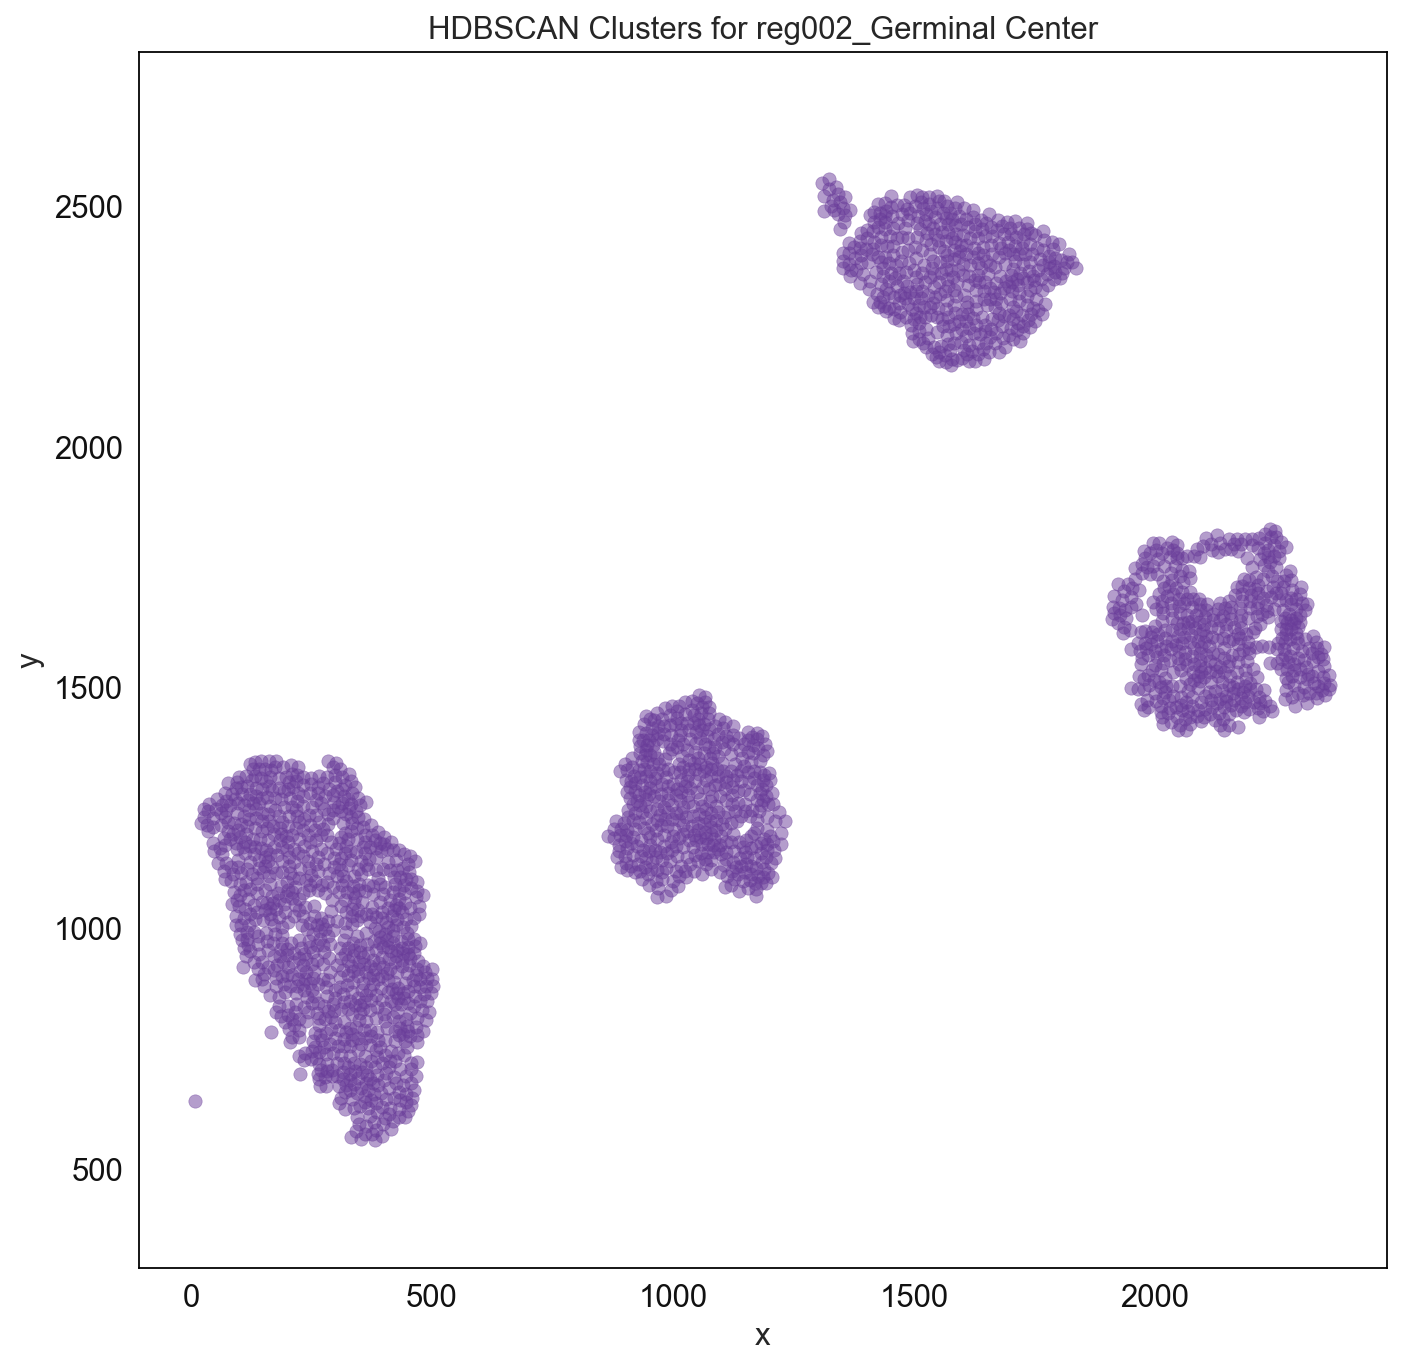

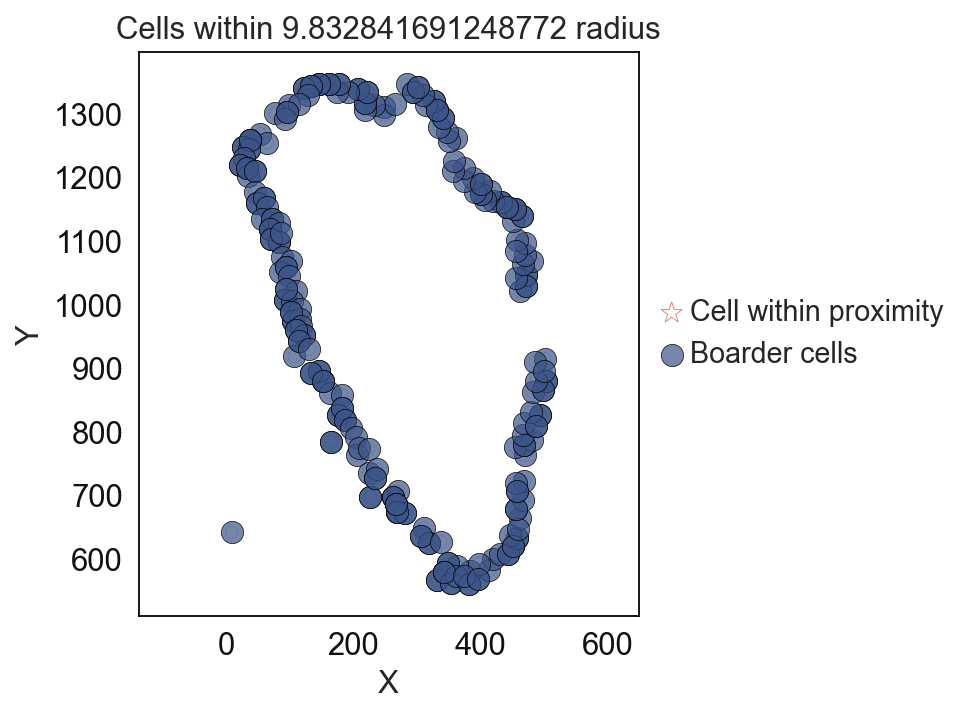

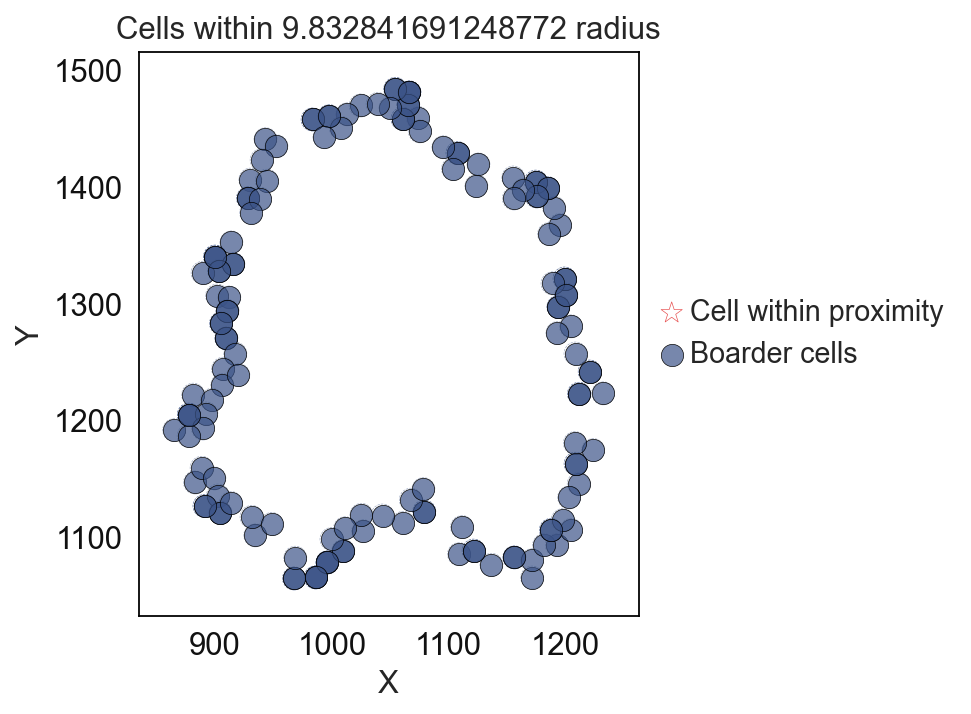

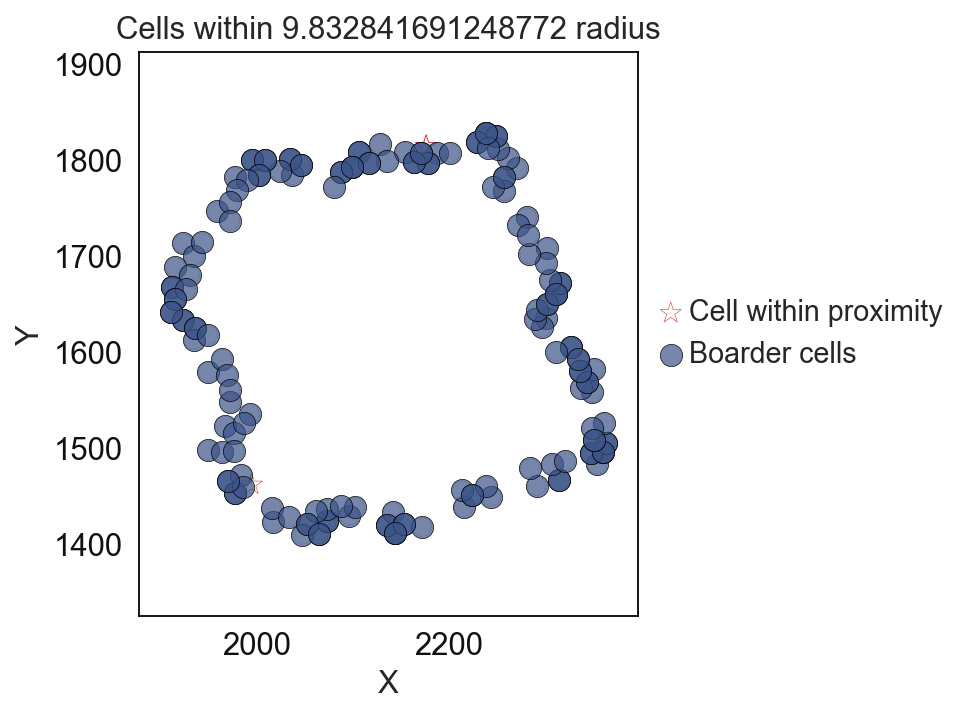

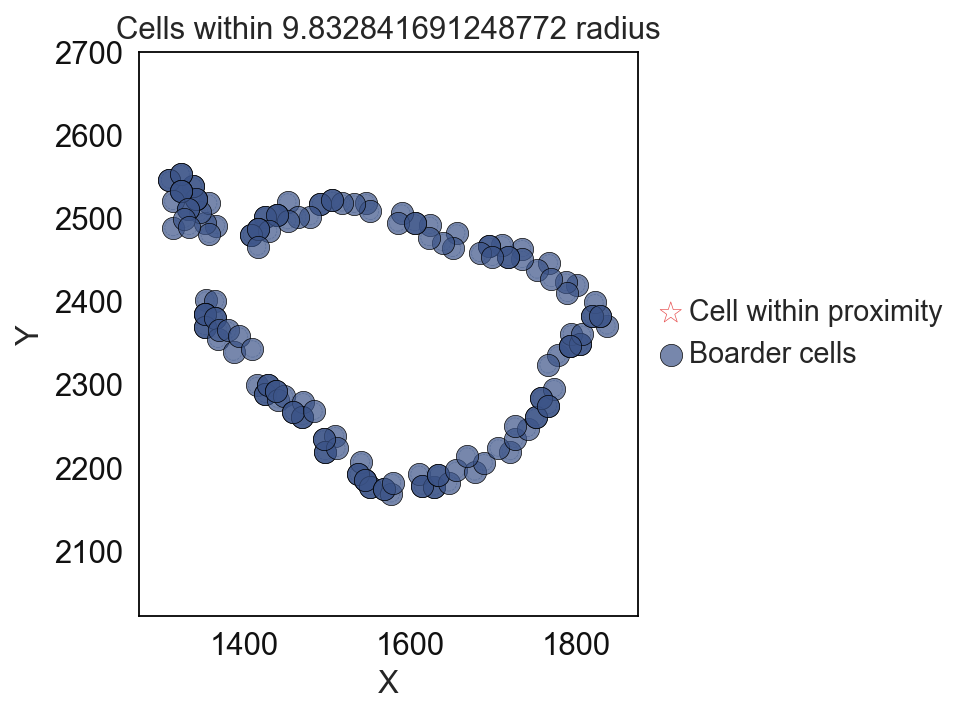

Finished reg002_Germinal Center
Estimated number of clusters: 2
Estimated number of noise points: 1


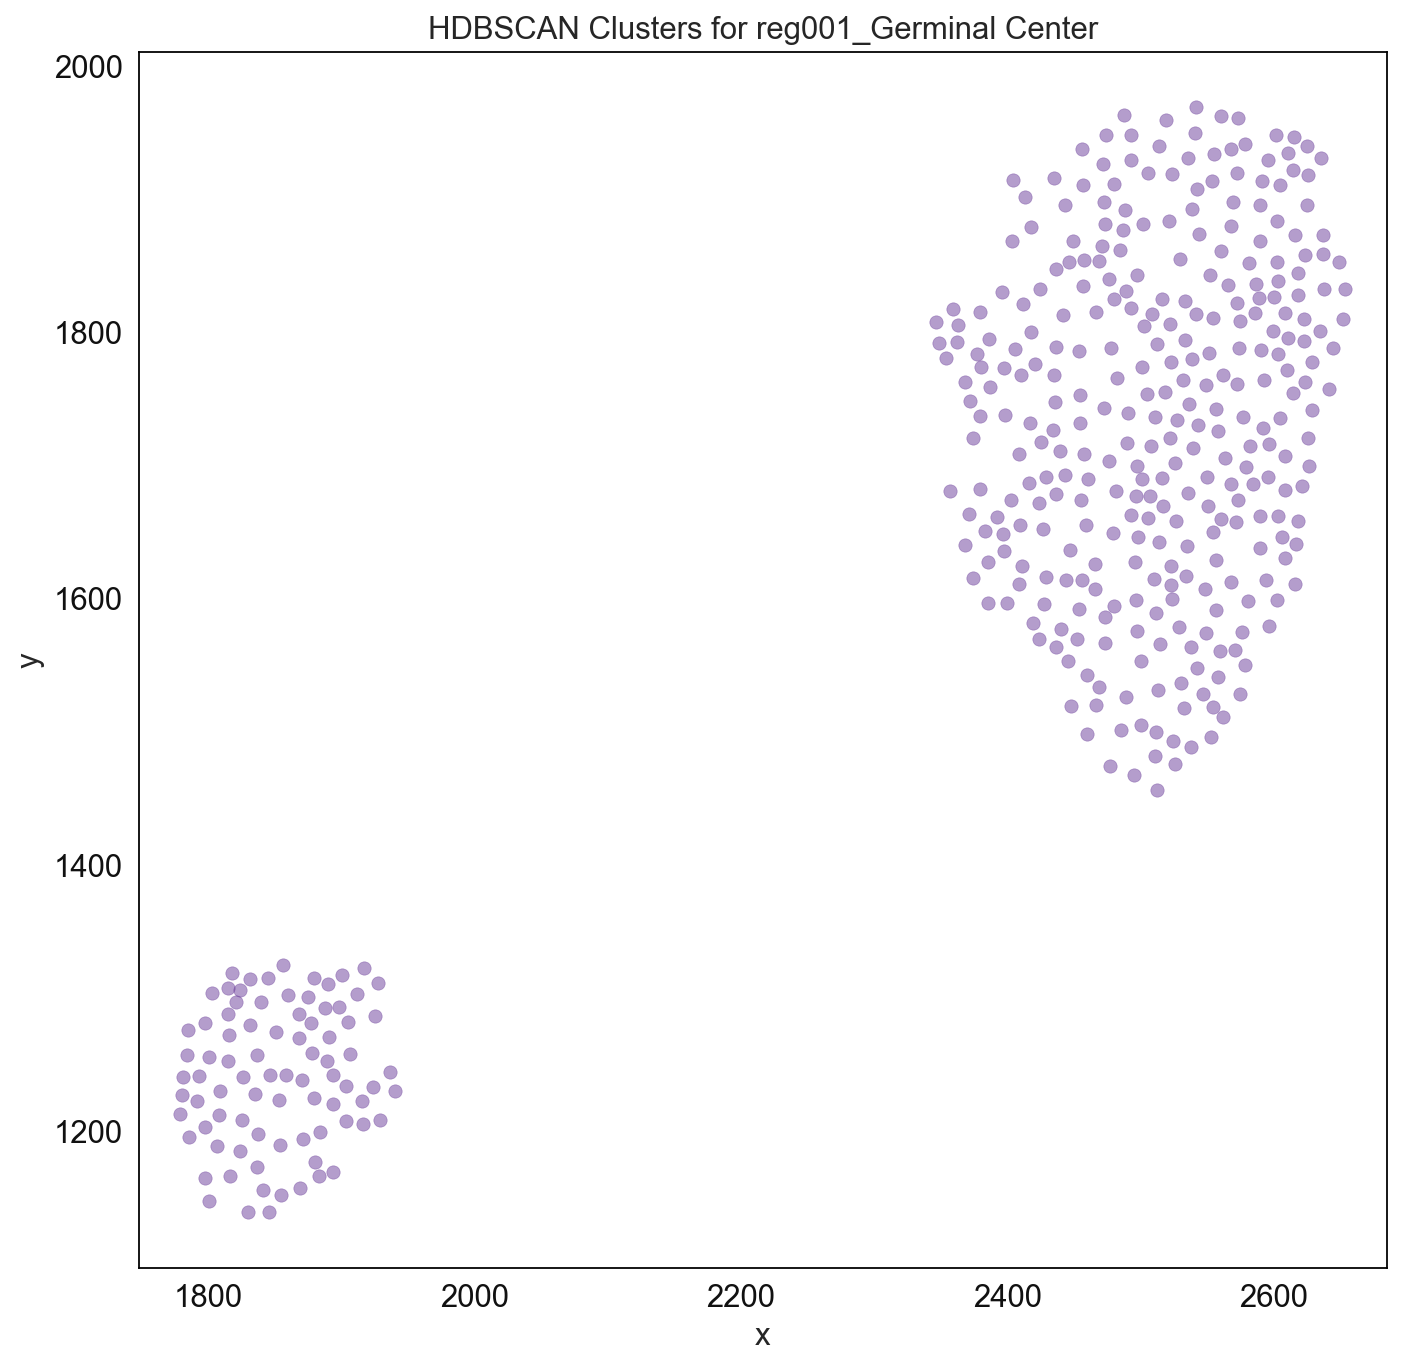

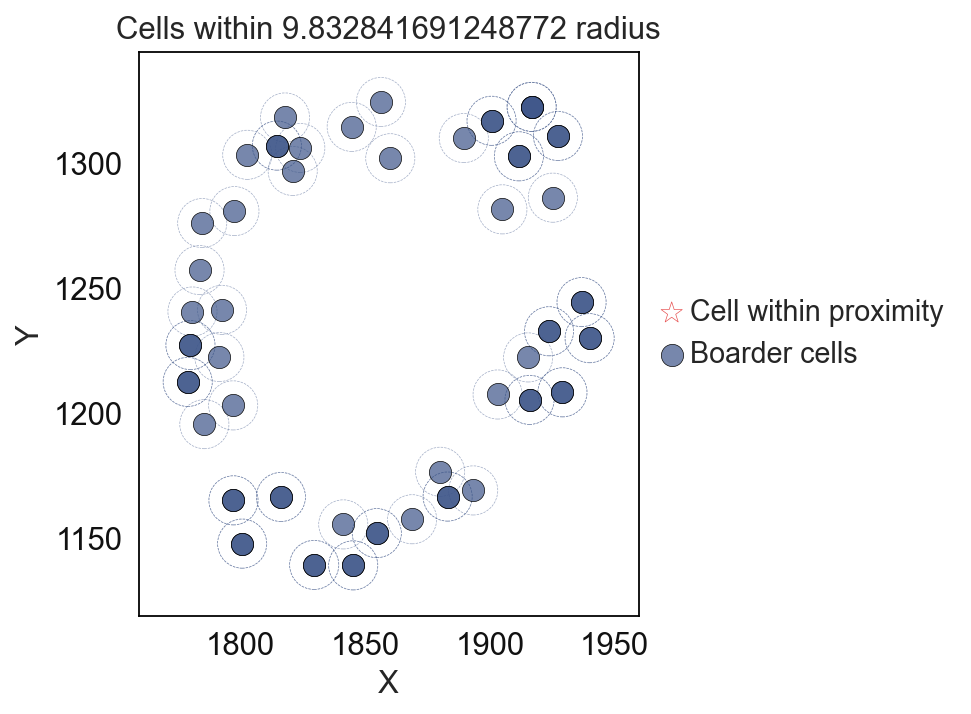

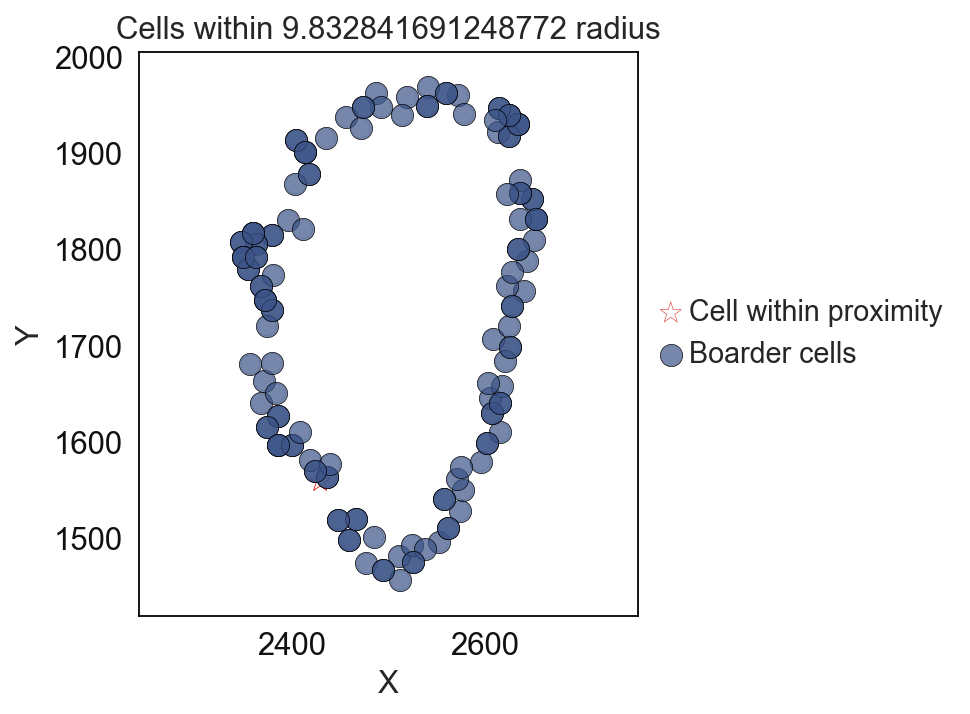

Finished reg001_Germinal Center
Estimated number of clusters: 4
Estimated number of noise points: 7
Finished reg002_Germinal Center
Estimated number of clusters: 2
Estimated number of noise points: 1
Finished reg001_Germinal Center
Estimated number of clusters: 4
Estimated number of noise points: 7
Finished reg002_Germinal Center
Estimated number of clusters: 2
Estimated number of noise points: 1
Finished reg001_Germinal Center
Estimated number of clusters: 4
Estimated number of noise points: 7
Finished reg002_Germinal Center
Estimated number of clusters: 2
Estimated number of noise points: 1
Finished reg001_Germinal Center
Estimated number of clusters: 4
Estimated number of noise points: 7
Finished reg002_Germinal Center
Estimated number of clusters: 2
Estimated number of noise points: 1
Finished reg001_Germinal Center


In [9]:
# this region result is also saved to adata.uns
region_results = sp.tl.patch_proximity_analysis(
    adata, 
    region_column = "unique_region", 
    patch_column = "CN_k20_n6_annot", 
    group="Germinal Center",
    min_cluster_size=50, 
    x_column='x', y_column='y', 
    radius = (5/0.5085), # to get the distance in µm
    edge_neighbours = 3,
    key_name = 'ppa_result_50',
    plot = True)

# this region result is also saved to adata.uns
region_results = sp.tl.patch_proximity_analysis(
    adata, 
    region_column = "unique_region", 
    patch_column = "CN_k20_n6_annot", 
    group="Germinal Center",
    min_cluster_size=50, 
    x_column='x', y_column='y', 
    radius = (10/0.5085), # to get the distance in µm
    edge_neighbours = 3,
    key_name = 'ppa_result_100',
    plot = False)

# this region result is also saved to adata.uns
region_results = sp.tl.patch_proximity_analysis(
    adata, 
    region_column = "unique_region", 
    patch_column = "CN_k20_n6_annot", 
    group="Germinal Center",
    min_cluster_size=50, 
    x_column='x', y_column='y', 
    radius = (15/0.5085), # to get the distance in µm
    edge_neighbours = 3,
    key_name = 'ppa_result_150',
    plot = False)

# this region result is also saved to adata.uns
region_results = sp.tl.patch_proximity_analysis(
    adata, 
    region_column = "unique_region", 
    patch_column = "CN_k20_n6_annot", 
    group="Germinal Center",
    min_cluster_size=50, 
    x_column='x', y_column='y', 
    radius = (20/0.5085), # to get the distance in µm
    edge_neighbours = 3,
    key_name = 'ppa_result_200',
    plot = False)

# this region result is also saved to adata.uns
region_results = sp.tl.patch_proximity_analysis(
    adata, 
    region_column = "unique_region", 
    patch_column = "CN_k20_n6_annot", 
    group="Germinal Center",
    min_cluster_size=50, 
    x_column='x', y_column='y', 
    radius = (25/0.5085), # to get the distance in µm
    edge_neighbours = 3,
    key_name = 'ppa_result_250',
    plot = False)

In [10]:
# save adata
adata.write(output_dir + 'adata_nn_demo_annotated_cn.h5ad')

... storing 'region_num' as categorical
... storing 'unique_region' as categorical
... storing 'condition' as categorical
... storing 'leiden_1' as categorical
... storing 'leiden_1_subcluster' as categorical
... storing 'cell_type_coarse' as categorical
... storing 'cell_type_coarse_subcluster' as categorical
... storing 'cell_type_coarse_f' as categorical
... storing 'cell_type_coarse_f_subcluster' as categorical
... storing 'cell_type_coarse_f_f' as categorical
... storing 'cell_type' as categorical
... storing 'CN_k20_n6_annot' as categorical


Key 0: ppa_result_250
Key 1: ppa_result_200
Key 2: ppa_result_150
Key 3: ppa_result_100
Key 4: ppa_result_50


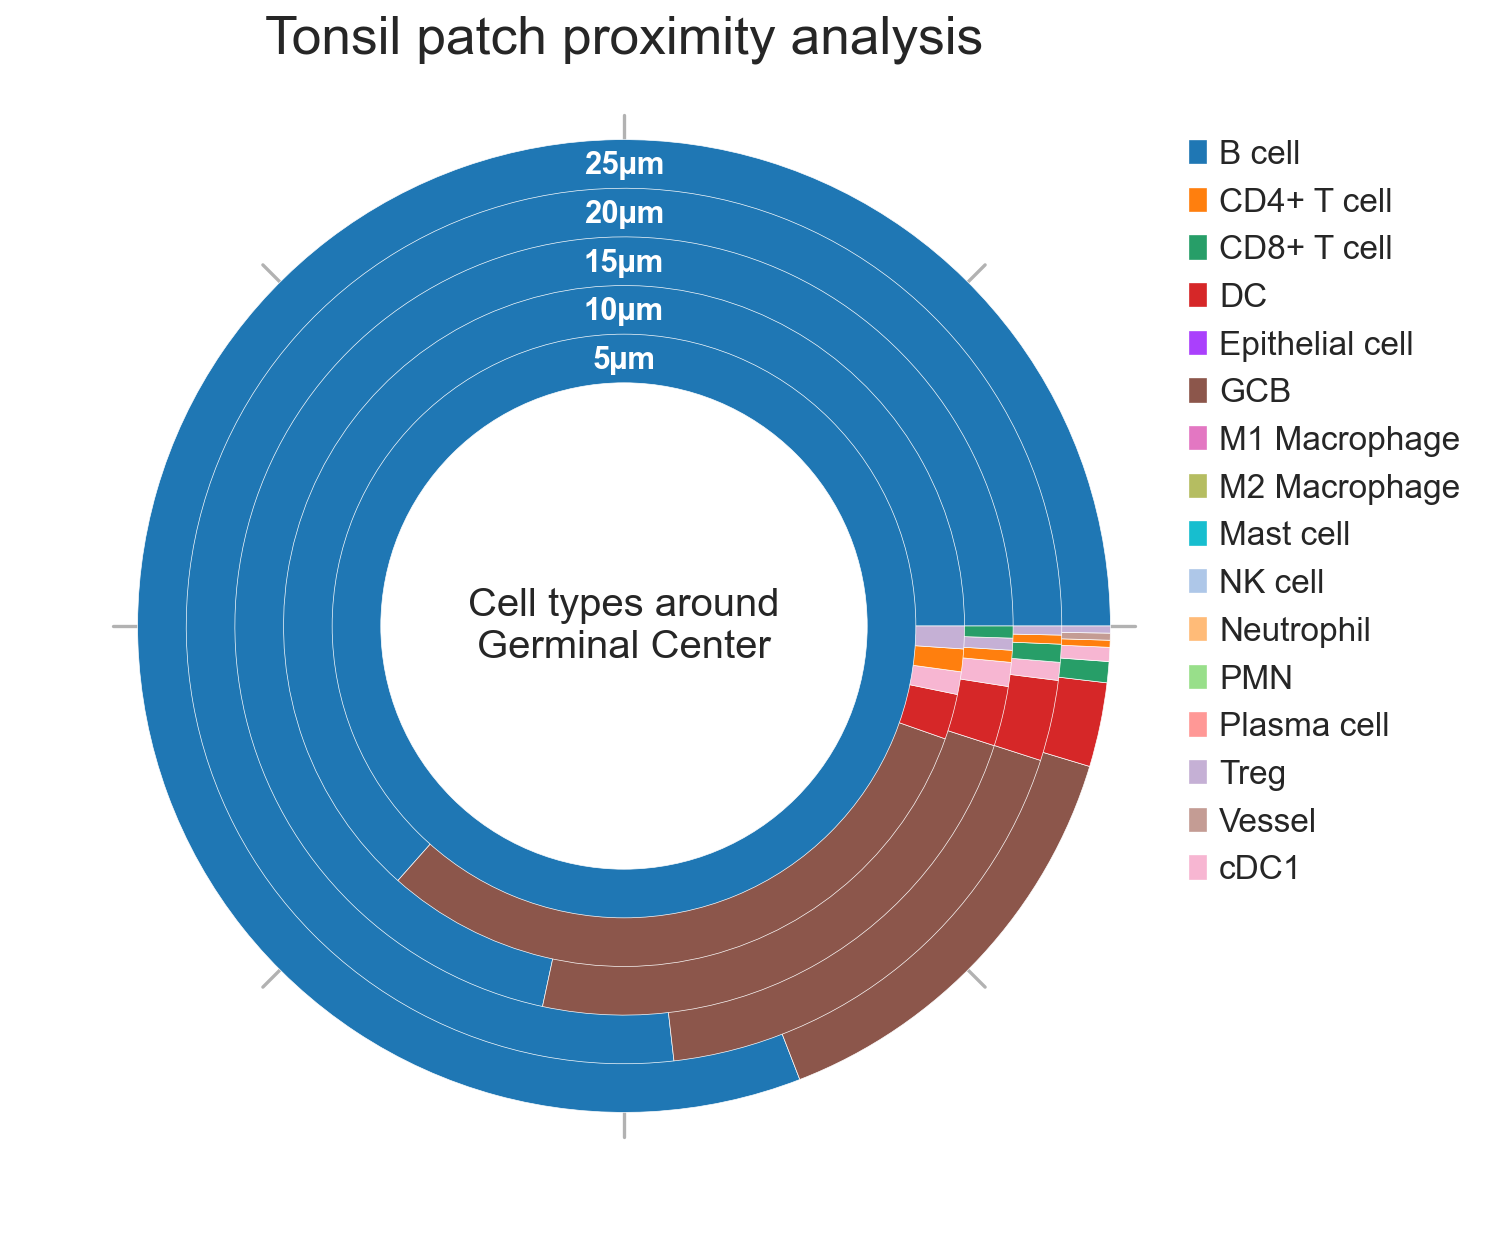

Key 0: ppa_result_250
Key 1: ppa_result_200
Key 2: ppa_result_150
Key 3: ppa_result_100
Key 4: ppa_result_50


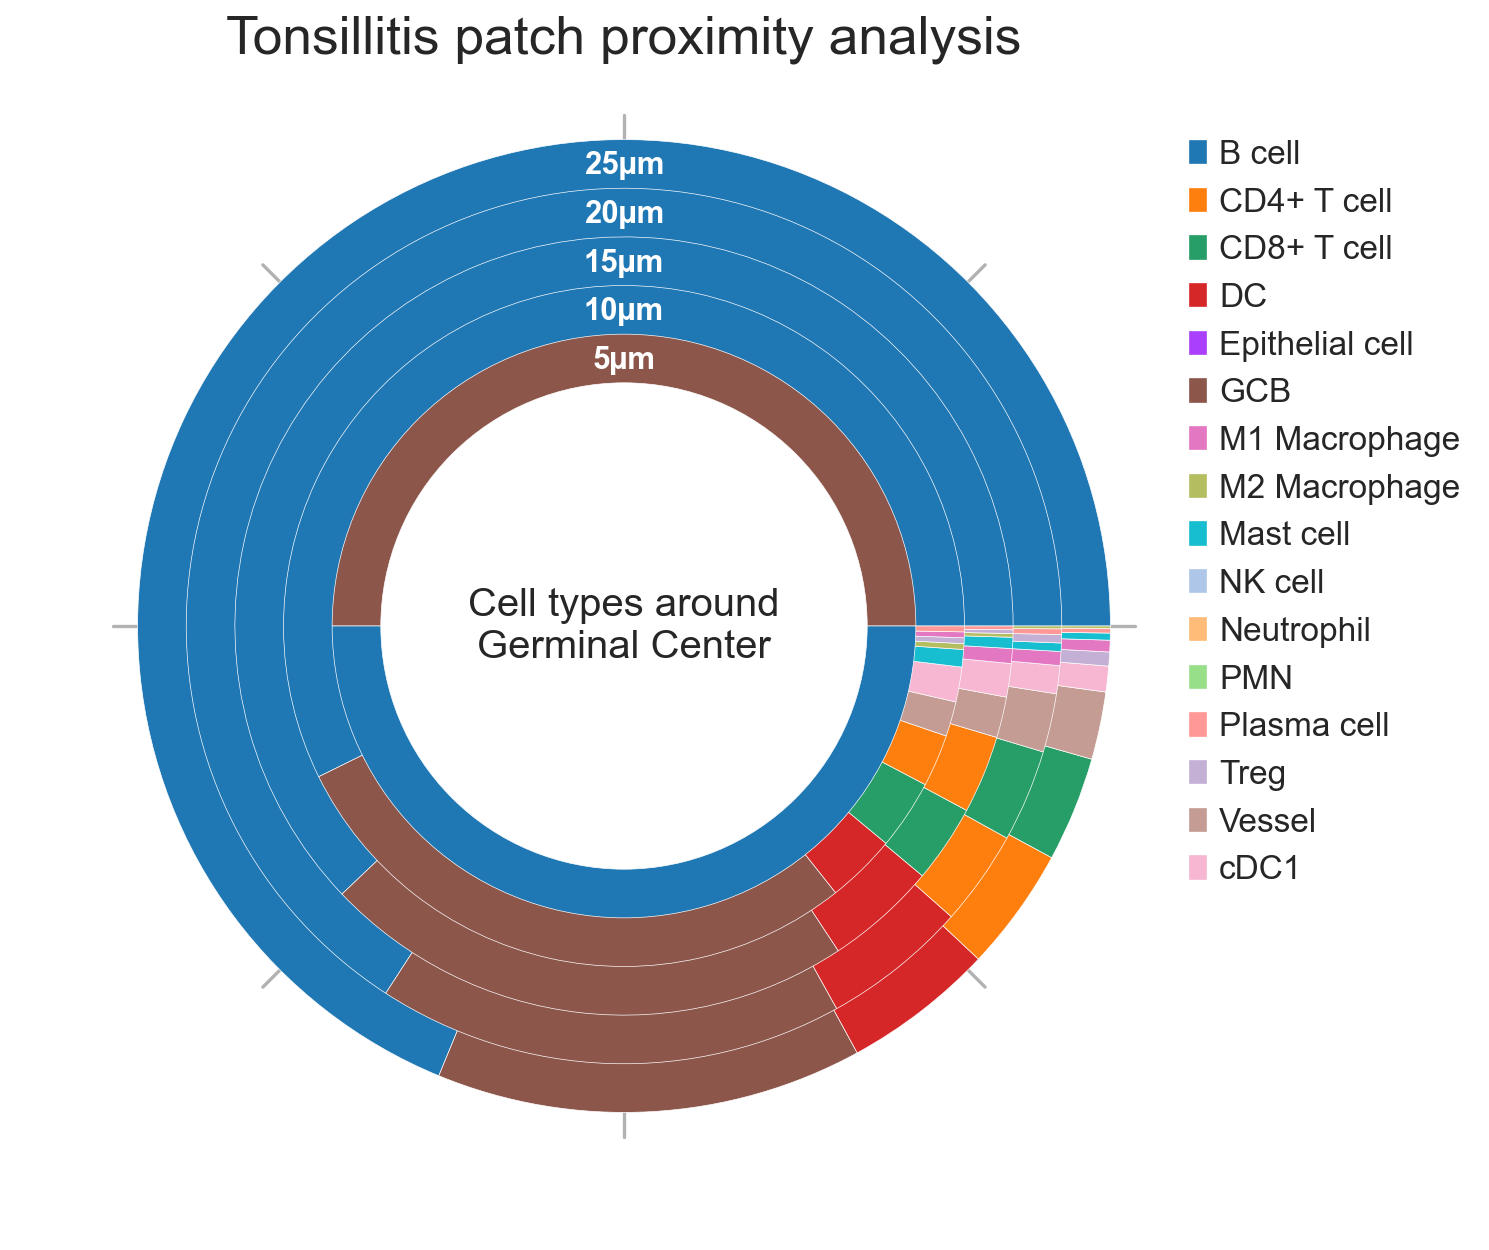

In [12]:
sp.pl.ppa_res_donut(adata, 
                palette=None,
                cat_col = "cell_type",
                key_names = ['ppa_result_50', 'ppa_result_100', 'ppa_result_150', 'ppa_result_200', 'ppa_result_250'],
                radii = [5, 10, 15, 20, 25],
                unit = 'µm',
                figsize = (10,10),  
                add_guides = True,
                text = 'Cell types around Germinal Center',
                label_color='white',
                subset_column = 'condition',
                subset_condition = 'tonsil',
                title='Tonsil patch proximity analysis')

sp.pl.ppa_res_donut(adata, 
                palette=None,
                cat_col = "cell_type",
                key_names = ['ppa_result_50', 'ppa_result_100', 'ppa_result_150', 'ppa_result_200', 'ppa_result_250'],
                radii = [5, 10, 15, 20, 25],
                unit = 'µm',
                figsize = (10,10),  
                add_guides = True,
                text = 'Cell types around Germinal Center',
                label_color='white',
                subset_column = 'condition',
                subset_condition = 'tonsillitis',
                title='Tonsillitis patch proximity analysis')

Key 0: ppa_result_250
Key 1: ppa_result_200
Key 2: ppa_result_150
Key 3: ppa_result_100
Key 4: ppa_result_50


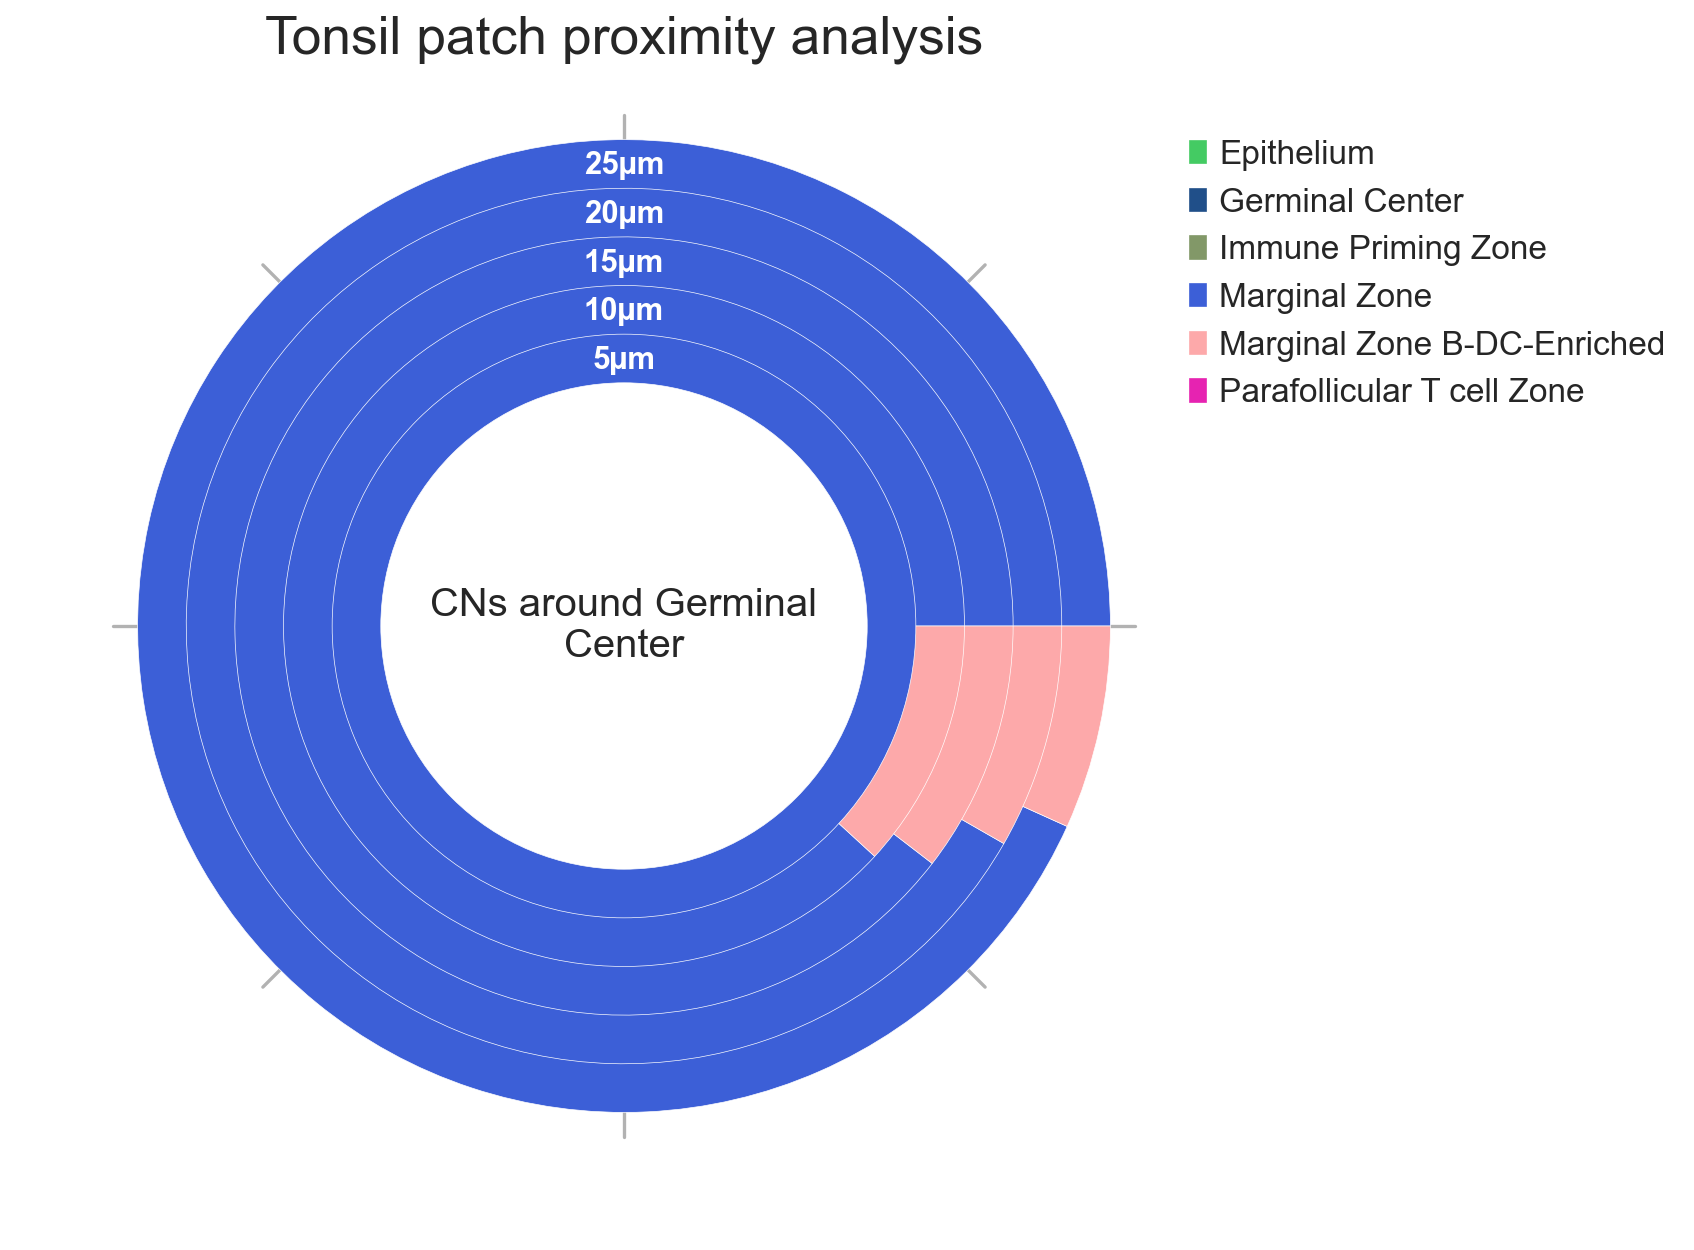

Key 0: ppa_result_250
Key 1: ppa_result_200
Key 2: ppa_result_150
Key 3: ppa_result_100
Key 4: ppa_result_50


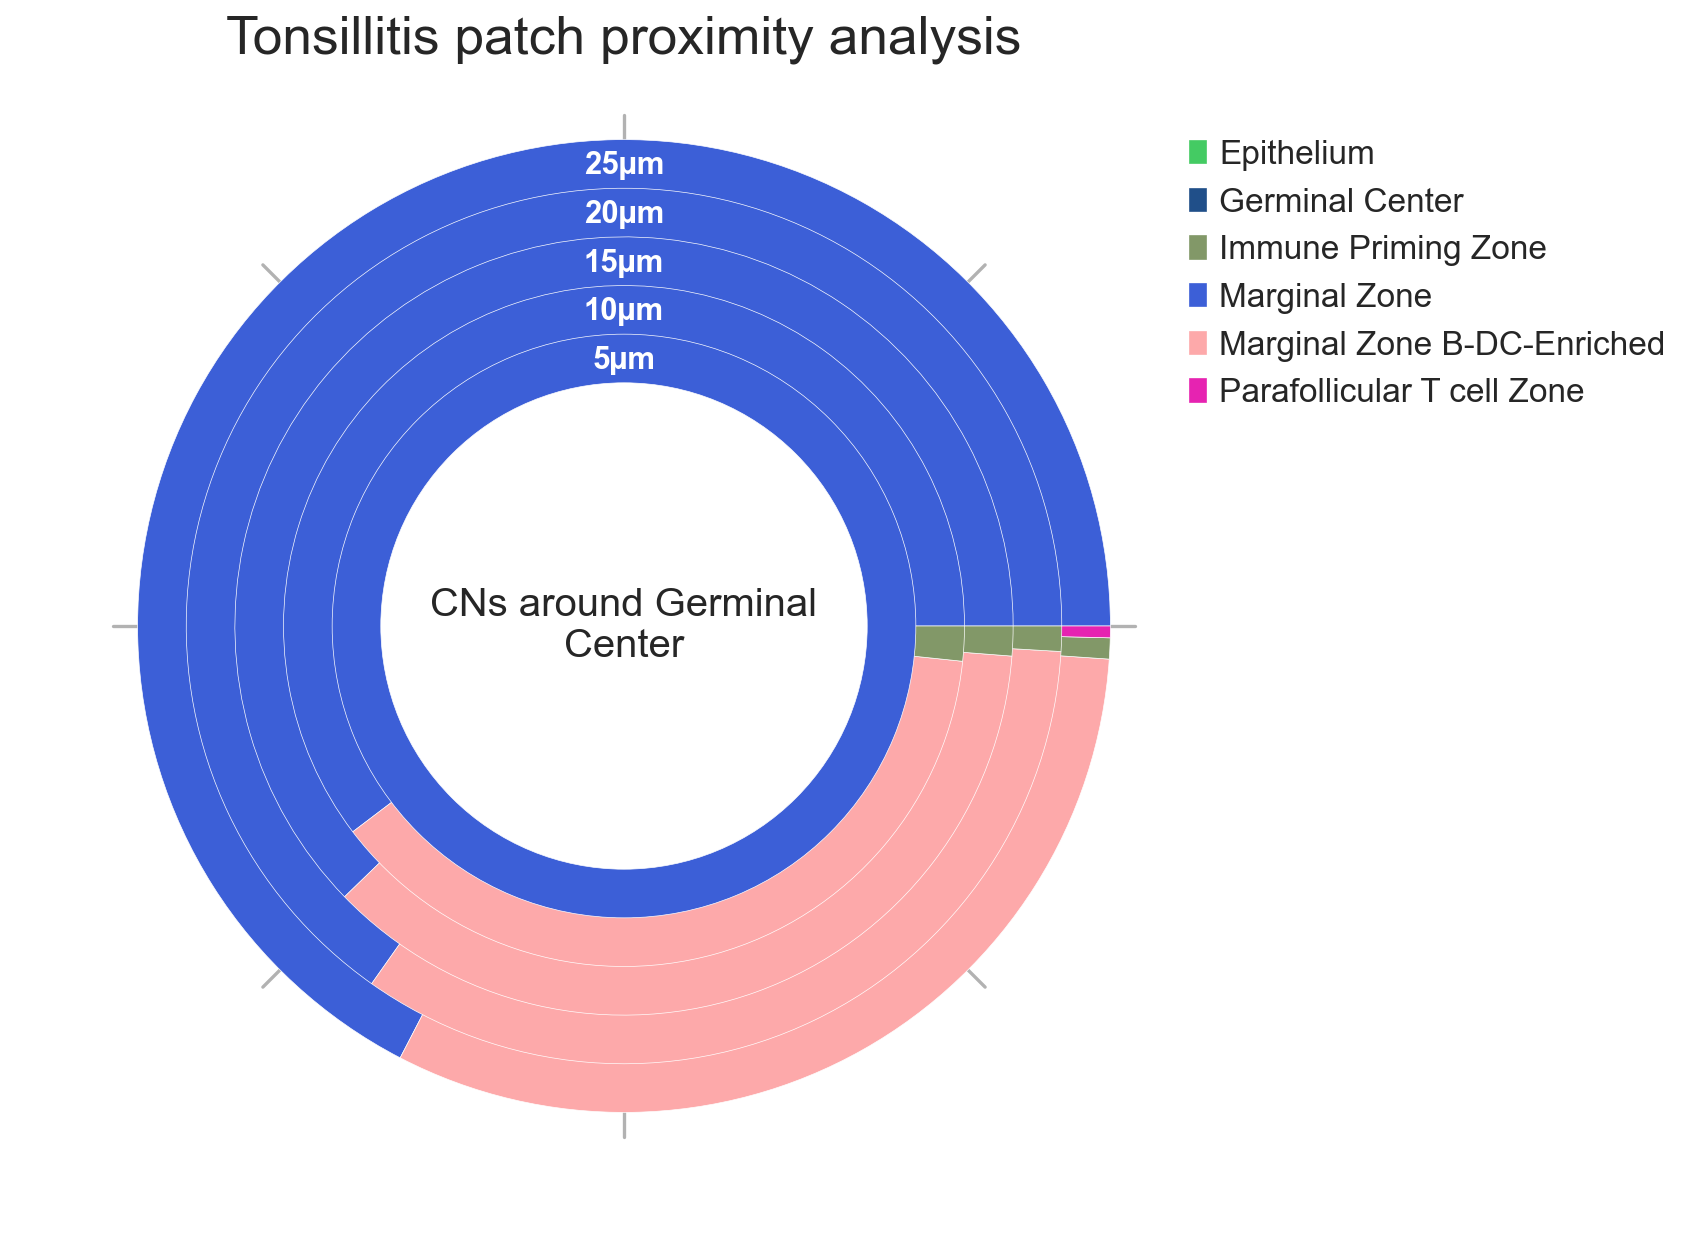

In [13]:
sp.pl.ppa_res_donut(adata, 
                palette=None,
                cat_col = "CN_k20_n6_annot",
                key_names = ['ppa_result_50', 'ppa_result_100', 'ppa_result_150', 'ppa_result_200', 'ppa_result_250'],
                radii = [5, 10, 15, 20, 25],
                unit = 'µm',
                figsize = (10,10),  
                add_guides = True,
                text = 'CNs around Germinal Center',
                label_color='white',
                subset_column = 'condition',
                subset_condition = 'tonsil',
                title='Tonsil patch proximity analysis')

sp.pl.ppa_res_donut(adata, 
                palette=None,
                cat_col = "CN_k20_n6_annot",
                key_names = ['ppa_result_50', 'ppa_result_100', 'ppa_result_150', 'ppa_result_200', 'ppa_result_250'],
                radii = [5, 10, 15, 20, 25],
                unit = 'µm',
                figsize = (10,10),  
                add_guides = True,
                text = 'CNs around Germinal Center',
                label_color='white',
                subset_column = 'condition',
                subset_condition = 'tonsillitis',
                title='Tonsillitis patch proximity analysis')